<a href="https://www.kaggle.com/code/utkarshx27/breast-cancer-dataset?scriptVersionId=129233875" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-dataset-used-royston-and-altman/gbsg.csv


In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score

df = pd.read_csv('/kaggle/input/breast-cancer-dataset-used-royston-and-altman/gbsg.csv')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df.head()

,Unnamed: 0,pid,age,meno,size,grade,nodes,pgr,er,hormon,rfstime,status
0,1,132,49,0,18,2,2,0,0,0,1838,0
1,2,1575,55,1,20,3,16,0,0,0,403,1
2,3,1140,56,1,40,3,3,0,0,0,1603,0
3,4,769,45,0,25,3,1,0,4,0,177,0
4,5,130,65,1,30,2,5,0,36,1,1855,0


In [4]:
print("Dimensions:", df.shape)

Dimensions: (686, 12)


In [5]:
df.describe()

,Unnamed: 0,pid,age,meno,size,grade,nodes,pgr,er,hormon,rfstime,status
count,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000
mean,343.500000,966.061224,53.052478,0.577259,29.329446,2.116618,5.010204,109.995627,96.252187,0.358601,1124.489796,0.435860
std,198.175427,495.506249,10.120739,0.494355,14.296217,0.582808,5.475483,202.331552,153.083963,0.479940,642.791948,0.496231
min,1.000000,1.000000,21.000000,0.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,8.000000,0.000000
25%,172.250000,580.750000,46.000000,0.000000,20.000000,2.000000,1.000000,7.000000,8.000000,0.000000,567.750000,0.000000
50%,343.500000,1015.500000,53.000000,1.000000,25.000000,2.000000,3.000000,32.500000,36.000000,0.000000,1084.000000,0.000000
75%,514.750000,1340.500000,61.000000,1.000000,35.000000,2.000000,7.000000,131.750000,114.000000,1.000000,1684.750000,1.000000
max,686.000000,1819.000000,80.000000,1.000000,120.000000,3.000000,51.000000,2380.000000,1144.000000,1.000000,2659.000000,1.000000


In [6]:
df.isnull().sum()

Unnamed: 0    0
pid           0
age           0
meno          0
size          0
grade         0
nodes         0
pgr           0
er            0
hormon        0
rfstime       0
status        0
dtype: int64

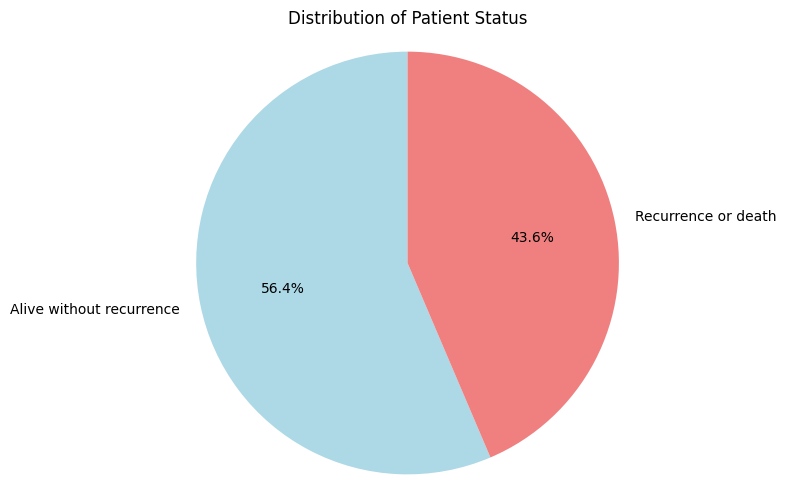

In [7]:
plt.figure(figsize=(6, 6))
status_counts = df['status'].value_counts()
labels = ['Alive without recurrence', 'Recurrence or death']
plt.pie(status_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Distribution of Patient Status')
plt.axis('equal')
plt.show()

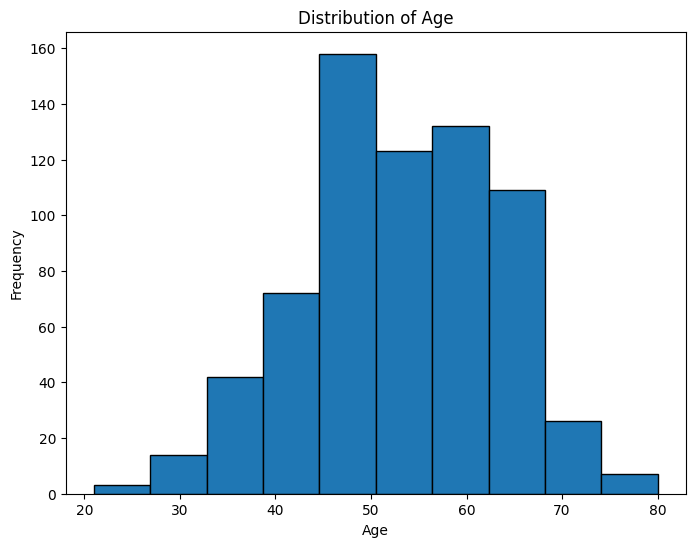

In [8]:
plt.figure(figsize=(8, 6))
plt.hist(df['age'], bins=10, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

Text(0, 0.5, 'Tumor Size (mm)')

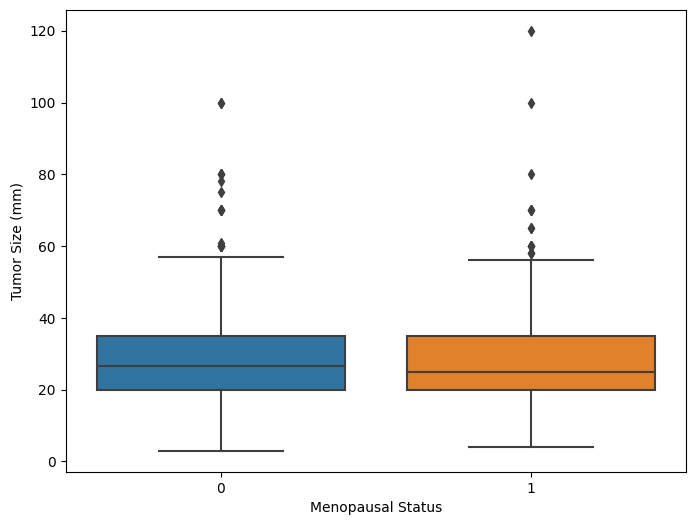

In [9]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='meno', y='size', data=df)
plt.xlabel('Menopausal Status')
plt.ylabel('Tumor Size (mm)')

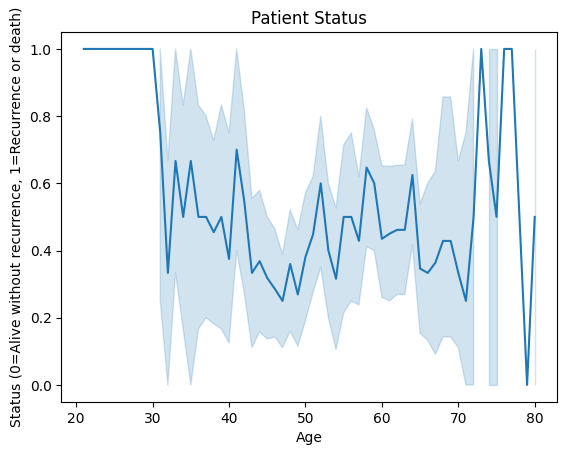

In [10]:
sns.lineplot(x='age', y='status', data=df)
plt.title('Patient Status')
plt.xlabel('Age')
plt.ylabel('Status (0=Alive without recurrence, 1=Recurrence or death)')
plt.show()

In [11]:
X =df.drop(['pid', 'status', 'rfstime', 'Unnamed: 0'], axis=1)
y =df['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = LogisticRegression()
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)                   #to fix

Accuracy: 0.5797101449275363


In [12]:
y_pred = model.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Precision: 0.65
Recall: 0.37142857142857144
F1 score: 0.4727272727272728
